# Polynomial Regression using Matplotlib and Scikit-Learn

### Import of the necessary modules

In [1]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Creation of the sample parameters

In [2]:
nsample = 300
sig = 0.5
x = numpy.linspace(0, 20, nsample)
X = numpy.column_stack((x, numpy.sin(x), (x - 5) ** 2, numpy.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = numpy.dot(X, beta)
y = y_true + sig * numpy.random.normal(size=nsample)


x = list(x)
y = list(y)

errorValues = None
# errorValues = [20, 3, 12, 8, 13, 9, 5, 2, 8, 19]  # example of error bars on the samples (symmetrical)

i = 0

answer = ""

### Creation of the fit automatically or with a defined degree

In [3]:
while True :
    answer = str(input("Choisir le degré ou Automatique ? (c/a) "))
    if answer == "c" or answer == "a" :
        break


b = True
if answer == "c" :
    while b :
        try :
            i = int(input("Degré : "))
            mymodel = numpy.poly1d(numpy.polyfit(x, y, i, w = errorValues))
            b = False
        except :
            print("Degré invalide")
else :
    mymodel = numpy.poly1d(numpy.polyfit(x, y, i))
    while float(r2_score(y, mymodel(x))) < 0.9 :
        i += 1
        mymodel = numpy.poly1d(numpy.polyfit(x, y, i, w = errorValues))

function = str(mymodel).split()
function = [x[:5] for x in function if "e-" not in x]

Choisir le degré ou Automatique ? (c/a) c
Degré : 9


### Formatting the polynomial equation to display it cleanly

In [4]:
j = i

while j >= 2 :
    function.remove(str(j))
    j -= 1

function_str = " ".join(function)

function_str = function_str.replace("x", "$x$")
function_str = function_str.replace(" - $x$", "")
function_str = function_str.replace(" + $x$", "")
str_x = str_y = "$x"

for k in range(i - 1) :
    r = "^{" + str(k+2) + "}"
    function_str = function_str.replace(str_x + "$", str_y + r + "$", i - k - 1)
    str_x = str_y + r

### Tracing the model function

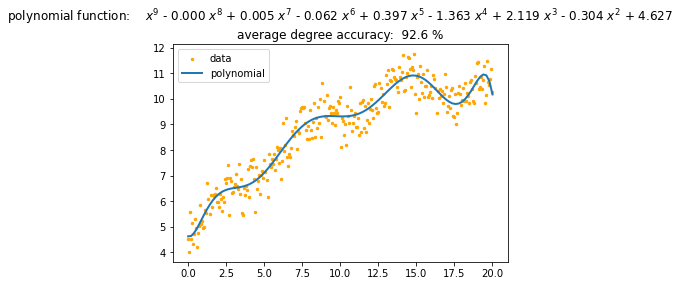

In [5]:
myline = numpy.linspace(x[0], x[-1], 100)

plt.scatter(x, y, label="data", c='orange', s=6)
plt.plot(myline, mymodel(myline), label="polynomial", linewidth=2)
plt.errorbar(x, y, yerr = errorValues, fmt = 'none', ecolor = 'orange', elinewidth = 1)


title = "polynomial function:    " + function_str + "\naverage degree accuracy:  " + (str(round(r2_score(y, mymodel(x)), 3) * 100))[:4] + " %"
plt.title(title)
plt.legend()
plt.show()